# [IAPR][iapr]: Lab 2 ‒  Object description


**Group ID:** xx

**Author 1 (sciper):** Student Name 1 (xxxxx)  
**Author 2 (sciper):** Student Name 2 (xxxxx)   
**Author 3 (sciper):** Student Name 3 (xxxxx)   

**Release date:** 26.03.2021  
**Due date:** 23.04.2021 


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature
import cv2
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

---
## Part 1
In the `lab-02-data/part1` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try:
1. Fourier Descriptors (15pts). 
    1. Implementation (10 pts).
    2. Showing invariance to rotation, translation and scaling (5 pts).
2. Additional method of your choice (5 pts)


**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point. Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

### 1.1 Data visualization

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
#  Load zeros and ones
zeros_im, zeros_names = load(data_part1, digit='0')
ones_im, ones_names = load(data_part1, digit='1')


# Plot images
#fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
#for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
  #  ax.imshow(im, cmap='gray')
   # ax.axis('off')
    #ax.set_title(nm)
#for ax, im, nm in zip(axes[1], ones_im, ones_names):
 #   ax.imshow(im, cmap='gray')
  #  ax.axis('off')
   # ax.set_title(nm)

### 1.2 Fourier descriptors (15 pts)

#### 1.2.1 Contour extraction


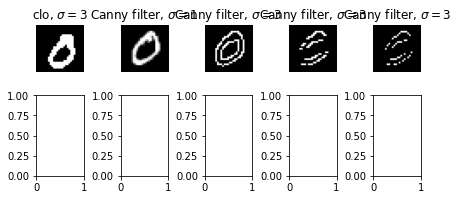

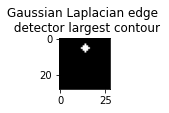

In [3]:
# Add your implementation and discussion
image = zeros_im[1]
image = ndi.gaussian_filter(image, 0.1)
edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=1)
eroded = ndi.binary_erosion(edges2, structure=np.ones((1,2)))
dilated = ndi.binary_dilation(eroded, structure=np.ones((1,2)))

im = zeros_im[0]
ret,thresh = cv2.threshold(im,50,255,cv2.THRESH_BINARY) # white 1, black 0
closing = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, np.ones((2,2))) # apply close operation, complete number shapes


fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(6, 3))

ax[0,0].imshow(closing, cmap='gray')
ax[0,0].set_title(r'clo, $\sigma=3$')

ax[0,1].imshow(image, cmap='gray')
ax[0,1].set_title(r'Canny filter, $\sigma=1$')

ax[0,2].imshow(edges1, cmap='gray')
ax[0,2].set_title(r'Canny filter, $\sigma=3$')

ax[0,3].imshow(dilated, cmap='gray')
ax[0,3].set_title(r'Canny filter, $\sigma=3$')


ax[0,4].imshow(eroded, cmap='gray')
ax[0,4].set_title(r'Canny filter, $\sigma=3$')



for a in ax[0,:]:
    a.axis('off')

fig.tight_layout()
plt.show()

# Find the contours of the different components in the filtered image from before
contours,_ = cv2.findContours(zeros_im[0],cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# Find largest contour (that we assume to be the brain)
contours_area=[]
for contour in contours:
    contours_area.append((cv2.contourArea(contour)))
max_cont = np.argsort(contours_area)[-1]

zeros = np.zeros_like(image)

plt.figure(figsize=(2,2))
plt.subplot(1,2,1)
plt.title('Gaussian Laplacian edge \n detector largest contour')
plt.imshow(cv2.drawContours(zeros, contours[max_cont], 0, (255, 0, 0), 3),cmap='gray')



### 1.3 Additional method (5 pts)

In [4]:
# Add your implementation and discussion

---
## Part 2
The `lab-02-data/part2` folder contains grey-scale pictures of handwritten "2" and "3".
Extract the same feature (typically 2 Fourier descriptors) as in part 1 also on these images and plot them on the same graph as the features of the "0" and "1".
Is it possible to discriminate all these 4 digits with a 2-dimensional feature vector?

### 2.1 Data visualization

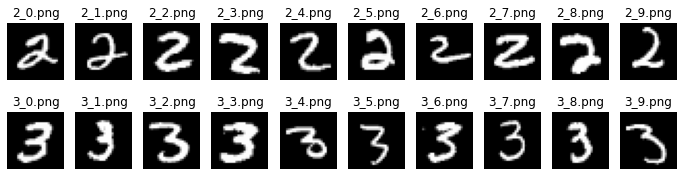

In [5]:
#  Load twos and threes
twos_im, twos_names = load(data_part2, digit='2')
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(2, len(twos_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)


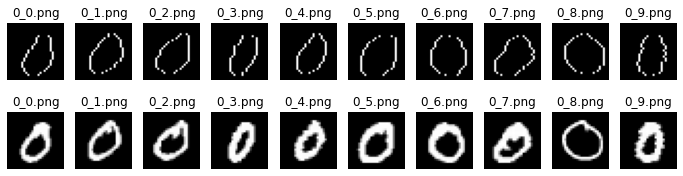

In [6]:
def naive_contours(img):
    """
    :param img:
    """
    _, thresh = cv2.threshold(img,50,255,cv2.THRESH_BINARY) # white 1, black 0
    img = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, np.ones((2,2))) # apply close operation, complete number shapes

    w, h = img.shape
    contours = []
    zero_im = np.zeros_like(img)
    for k in range(w):
        i, j = 0, -1
        while (img[k, [i,j]] == [0,0] ).any() and i-j <=h:
            if not img[k,i]:
                i += 1
            if not img[k,j]:
                j -= 1
        if i+1-j>=h:
            continue
        contours.extend([[i,k], [h+j,k]])
        zero_im[k,i]= 255
        zero_im[k, h+j] = 255
    contours = sorted(contours, key= lambda x: sum(x))
    return zero_im, np.array(contours)

# Plot images
zeros_naive_contours = [naive_contours(im)[0] for im in zeros_im]
ones_naive_contours = [naive_contours(im)[0] for im in ones_im]
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_naive_contours, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

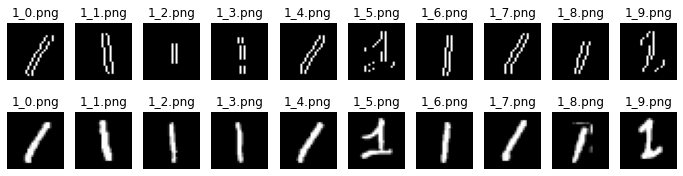

In [7]:
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], ones_naive_contours, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 2.2 Fourier descriptors - 4 digits (10 pts)

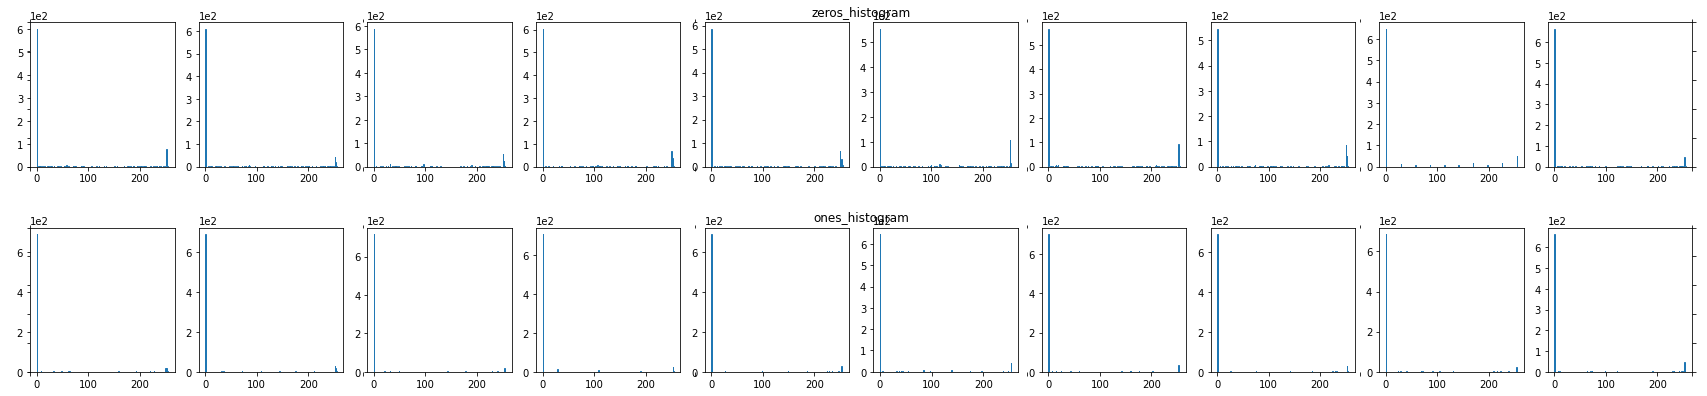

In [39]:
fig, axes = plt.subplots( figsize=(24, 6) , nrows=2, ncols=1, sharey=True, sharex=True)
names = ['zeros_histogram', 'ones_histogram']
for row, ax in enumerate(axes, start=1):
    ax.set_title(names[row-1])
    ax.tick_params(labelcolor=(1.,1.,1., .0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    ax._frameon = False
n_count = len(zeros_im)
for i in range(1,2*n_count +1):
    im = zeros_im[i-1] if i <n_count else ones_im[i-n_count-1]
    ax = fig.add_subplot(2,n_count,i)
    ax.hist(im.ravel(), bins=256, histtype='step')
    ax.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
plt.tight_layout()



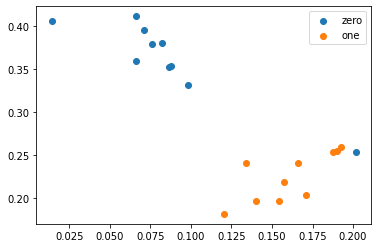

In [52]:
def get_fourier_descriptors(im):
    """

    :param im:
    :return:
    """
    #im = cv2.Laplacian(im, cv2.CV_16S, ksize=3)
    #im = cv2.convertScaleAbs(im)
    ret,im = cv2.threshold(im,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU) # white 1, black 0
    #im = np.where(im>128, 255,0).astype(np.uint8)
    #print(im.dtype)
    #im = cv2.Laplacian(im, cv2.CV_16S, ksize=3)
    #im = cv2.convertScaleAbs(im)
    im = cv2.morphologyEx(im, cv2.MORPH_OPEN, np.ones((2,2),np.uint8)) # apply close operation, complete number shapes
    #_, cnt = naive_contours(im)
    cnt, _= cv2.findContours(im,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    max_cont = np.argmax([cv2.contourArea(ctr) for ctr in cnt ])
    cnt = cnt[max_cont][:, 0, :]
    cnt_z = cnt[:,0] + 1j*cnt[:,1]

    cnt_fourier = np.fft.fft(cnt_z)
    cnt_fourier /= abs(cnt_fourier[0])
    f1,f2 = np.abs(cnt_fourier[[1,2]])
    f3 = np.angle(cnt_fourier[1])
    features = np.array((f1,f2,f3))
    return features

zeros_fourier_descriptors = np.array([get_fourier_descriptors(im) for im in zeros_im])
ones_fourier_descriptors = np.array([get_fourier_descriptors(im) for im in ones_im])
#plt.axis("equal")
plt.scatter(zeros_fourier_descriptors[:,0], zeros_fourier_descriptors[:,1])
plt.scatter(ones_fourier_descriptors[:,0], ones_fourier_descriptors[:,1])
plt.legend(["zero","one"])

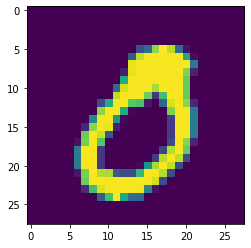

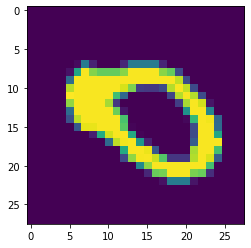

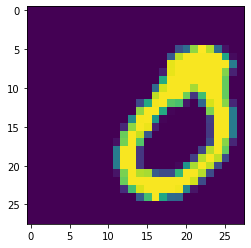

In [86]:
#fig = plt.figure()
#ax.axis("auto")
#ax = fig.add_subplot(projection='3d')
#ax.scatter(zeros_fourier_descriptors[:,2], zeros_fourier_descriptors[:,1],zeros_fourier_descriptors[:,0])
#ax.scatter(ones_fourier_descriptors[:,2], ones_fourier_descriptors[:,1],ones_fourier_descriptors[:,0])
#ax.legend(["zero","one"])
#im = zeros_im[0]


def transform(img, type:str ="r", theta=None, tx=None, ty=None):
    """
    :param type:
    :param ty:
    :param tx:
    :param img:
    :param theta:
    :return:
    """
    h, w = img.shape
    cent_x, cent_y = w//2, h//2
    mat = None
    if type.lower().startswith("t"):
        assert tx is not None and ty is not None, 'tx and ty must be float'
        mat = mat = np.float32([ [1,0,tx], [0,1,ty] ])
    elif type.lower().startswith("r"):
        assert theta is not None , 'angle must be float in degrees '
        mat = cv2.getRotationMatrix2D((cent_x, cent_y), theta, 1.0)


    return cv2.warpAffine(img, mat, (w, h))
    # Add your implementation and discussion


def rotate_image1(img, theta):
    """
    :param img:
    :param theta:
    :return:
    """
    return ndi.rotate(img, theta, reshape=True)
    # Add your implementation and discussion


im = zeros_im[0]
imr = transform(im, "r", theta=90)
imr1 = transform(im, "t", tx =5,ty=0)
plt.imshow(im)
plt.show()
plt.imshow(imr)
plt.show()
plt.imshow(imr1)
plt.show()

def ptd(type,theta=None, tx=None,ty=None):
    """
    :param type:
    :param theta:
    :param tx:
    :param ty:
    :return:
    """
    if theta :
        return dict(theta=theta, type=type)
    else:
        return dict(tx=tx, ty=ty, type=type)

n_images = 2

params = [ptd('r',theta=45), ptd('t',tx=5,ty=0)]
add_ones_im = [[transform(im,**params[i]) for im in ones_im ] for i in range(n_images)]

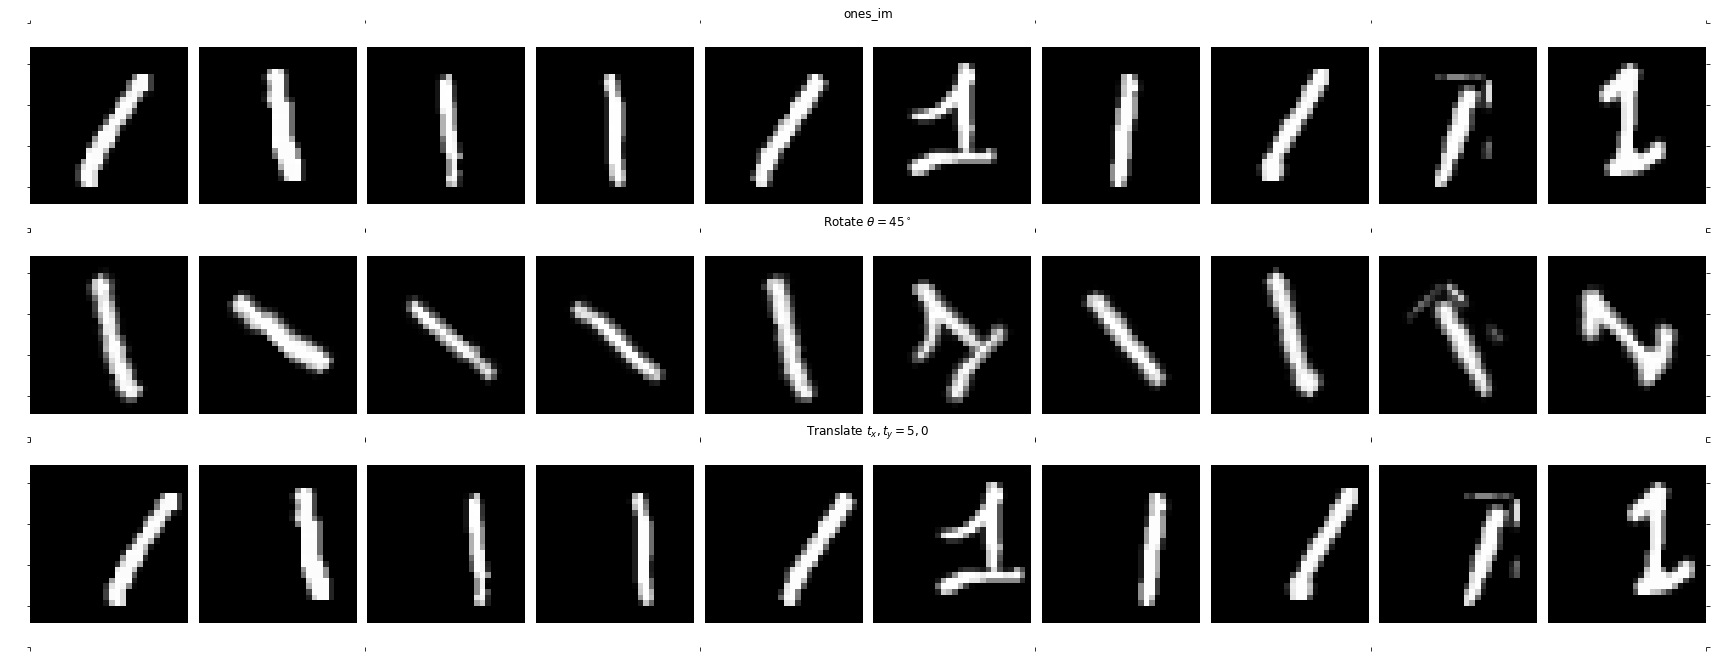

In [102]:
fig, axes = plt.subplots( figsize=(24, 9) , nrows=3, ncols=1, sharey=True, sharex=True)
names = ["ones_im",r'Rotate $\theta=45^\circ$', r'Translate $t_x,t_y=5,0$']
for row, ax in enumerate(axes, start=1):
    ax.set_title(names[row-1])
    ax.tick_params(labelcolor=(1.,1.,1., .0), top='off', bottom='off', left='off', right='off')
    # remove the white frame
    ax._frameon = False
n_count = len(zeros_im)

for i in range(1,3*n_count +1):
    im = add_ones_im[(i-1)//n_count -1][i%n_count -1] if i>n_count else ones_im[i-1]
    ax = fig.add_subplot(3,n_count,i)
    ax.axis("off")
    ax.imshow(im, cmap="gray")

plt.tight_layout()

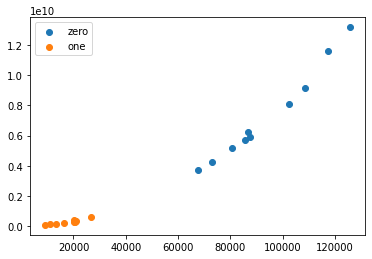

In [113]:
def index_select(contours, criterion=np.argmax):
    """
    :param contours:
    :param criterion:
    :return:
    """
    contours_area= np.array([cv2.contourArea(cnt) for cnt in contours])
    return criterion(contours_area)

def rect_criterion(img):
    """

    :param img:
    :return:
    """
    rect= []
    _, img = cv2.threshold(im, 127, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours,_ = cv2.findContours(img,2,1)
    contours_area= np.array([cv2.contourArea(cnt) for cnt in contours])
    m_cont = np.median(contours_area)
    s = contours_area[m_cont]
    box = cv2.minAreaRect(contours[m_cont])

    box = cv2.boxPoints(box)
    s_box = cv2.contourArea(np.int0(box))
    rect.append(s/s_box)
    return rect

# compute moments of contours
# features can be chosen among M1,M2,M3,M4 for index 0,1,2,3 respectivement
def moments_criterion(img):
    """
    :param img:
    :return:
    """
    features= np.empty(4)
    _, img = cv2.threshold(img, 127, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #img = cv2.morphologyEx(img, cv2.MORPH_OPEN, np.ones((2,2),np.uint8))
    contours,_ = cv2.findContours(img,2,1)
    # compute the moments
    max_cont = index_select(contours)
    M = cv2.moments(contours[max_cont])
    features[0] = M['m20']+M['m02']
    features[1] = (M['m20']-M['m02'])**2+4*M['m11']**2
    features[2] =(M['m30']-3*M['m12'])**2+(3*M['m21']-M['m03'])**2
    features[3] = (M['m30']+M['m12'])**2+(M['m21']+M['m03'])**2
    return features[[0,1]]

zeros_moments_descriptors = np.array([moments_criterion(im) for im in zeros_im])
ones_moments_descriptors = np.array([moments_criterion(im) for im in ones_im])
#plt.axis("equal")
plt.scatter(zeros_moments_descriptors[:,0], zeros_moments_descriptors[:,1])
plt.scatter(ones_moments_descriptors[:,0], ones_moments_descriptors[:,1])
plt.legend(["zero","one"])

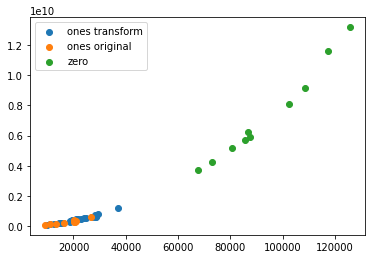

In [125]:
# TODO: calculer variance intra classe
# TODO: afficher les features par transformation
# TODO: rotation, translation et rotation+translation
n_images=3
params = [ptd('r',theta=45), ptd('t',tx=5,ty=0), ptd('r',theta=90)]
add_ones_im = [[transform(im,**params[i]) for im in ones_im ] for i in range(n_images)]
add_ones_moments = np.array([moments_criterion(img) for img in add_ones_im[0] + add_ones_im[1] + add_ones_im[2]])
plt.scatter(add_ones_moments[:,0], add_ones_moments[:,1])
plt.scatter(ones_moments_descriptors[:,0], ones_moments_descriptors[:,1])
plt.scatter(zeros_moments_descriptors[:,0], zeros_moments_descriptors[:,1])
plt.legend(["ones transform","ones original","zero"])